## Isogeny skips

This notebook contains a simple visualizations for data collected by glitching CSIDH on Chipwhisperer, goal is to check how often do glitches cause a skip of single isogeny.

In [22]:
import os
PATH = "/home/xjaros2/Documents/git/csidh-setup/"
os.chdir(PATH)

In [23]:
import pandas as pd

In [24]:
datasets = [
    "csidh-target/scripts/data/dummy-results/cwlite/results-[10,-10,10]-attack2-tight-trigger-clkgen_x4.csv",
    #"csidh-target/scripts/data/dummy-results/cwlite/results-[10,-10,10]-attack2.csv",
    #"csidh-target/scripts/data/dummy-results/cwlite/results-[10,-10,10]-attack2.csv"
]

In [25]:
pwd

'/home/xjaros2/Documents/git/csidh-setup'

In [26]:
for i,dataset in enumerate(datasets):
    datasets[i] = pd.read_csv(dataset)

In [27]:
from csidh import CSIDHDLL
PATH = "/home/xjaros2/Documents/git/csidh-setup/csidh-target/src/"
csidhdll = CSIDHDLL(src_path=PATH)


def isogeny_in_distance(public, i):
    csidhdll.public = csidhdll.to_projective(public)
    private = [0, 0, 0]
    
    private[i] = -1
    csidhdll.private = private
    positive_isogeny_skipped =  csidhdll.from_projective(csidhdll.action())

    private[i] = 1
    csidhdll.private = private
    negative_isogeny_skipped = csidhdll.from_projective(csidhdll.action())
    return [positive_isogeny_skipped, negative_isogeny_skipped]

-- Configuring done (0.0s)
-- Generating done (0.0s)
-- Build files have been written to: /home/xjaros2/Documents/git/csidh-setup/csidh-target/src/build
[ 14%] Building C object CMakeFiles/csidh.dir/csidh.c.o
[ 28%] Building C object CMakeFiles/csidh.dir/mont.c.o
[ 42%] Linking C shared library libcsidh.so
[100%] Built target csidh


In file included from /nix/store/mrgib0s2ayr81xv1q84xsjg8ijybalq3-glibc-2.38-27-dev/include/assert.h:35,
                 from /home/xjaros2/Documents/git/csidh-setup/csidh-target/src/csidh.c:2:
/nix/store/mrgib0s2ayr81xv1q84xsjg8ijybalq3-glibc-2.38-27-dev/include/features.h:414:4: warning: #warning _FORTIFY_SOURCE requires compiling with optimization (-O) [-Wcpp]
  414 | #  warning _FORTIFY_SOURCE requires compiling with optimization (-O)
      |    ^~~~~~~
In file included from /nix/store/mrgib0s2ayr81xv1q84xsjg8ijybalq3-glibc-2.38-27-dev/include/bits/libc-header-start.h:33,
                 from /nix/store/mrgib0s2ayr81xv1q84xsjg8ijybalq3-glibc-2.38-27-dev/include/stdint.h:26,
                 from /nix/store/hf2gy3km07d5m0p1lwmja0rg9wlnmyr7-gcc-12.3.0/lib/gcc/x86_64-unknown-linux-gnu/12.3.0/include/stdint.h:9,
                 from /home/xjaros2/Documents/git/csidh-setup/csidh-target/src/parametrization.h:4,
                 from /home/xjaros2/Documents/git/csidh-setup/csidh-target

In [28]:
import seaborn as sns

In [47]:
df = datasets[0]

In [57]:
df["scope.glitch.ext_offset"].min()

np.int64(2152)

In [56]:
df = df[df["good/bad/crash"] == "bad"]
df = df[df["public"] == 199]
df.reset_index().sort_values("scope.glitch.ext_offset")

,index,scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,scope.glitch.ext_offset,good/bad/crash,public
9,2349,5.078125,-12.890625,17,2152,bad,199.0
25,6174,-8.984375,46.093750,15,2159,bad,199.0
17,3356,-8.984375,46.093750,13,2160,bad,199.0
5,771,3.125000,-12.890625,14,2161,bad,199.0
27,6197,3.125000,-12.890625,13,2161,bad,199.0
2,576,-12.890625,-46.093750,14,2162,bad,199.0
0,81,-3.125000,39.843750,17,2165,bad,199.0
32,8345,-12.890625,-46.875000,12,2165,bad,199.0
23,5778,-8.984375,46.093750,13,2166,bad,199.0
18,3579,-12.109375,-46.875000,14,2166,bad,199.0


In [55]:
df[(df["scope.glitch.ext_offset"] < 2940) & (df["scope.glitch.ext_offset"] > 2919)].sort_values("scope.glitch.ext_offset")

,scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,scope.glitch.ext_offset,good/bad/crash,public
4435,-5.859375,42.187500,13,2920,bad,51.0
5129,-12.890625,-46.093750,16,2920,crash,NaN
3834,5.078125,7.031250,7,2920,bad,29.0
1212,3.125000,-12.890625,2,2921,good,0.0
4802,-12.109375,-46.875000,7,2921,good,0.0
5481,-12.890625,-46.093750,12,2921,bad,51.0
9774,-8.984375,46.093750,6,2921,crash,NaN
5114,-8.984375,46.093750,9,2922,bad,2.0
8394,-12.109375,-46.875000,2,2922,good,0.0
9384,-7.031250,42.968750,3,2922,good,0.0


In [44]:
df = datasets[0]
df[(2150 < df["scope.glitch.ext_offset"]) & (df["good/bad/crash"] )]

,scope.glitch.width,scope.glitch.offset,scope.glitch.repeat,scope.glitch.ext_offset,good/bad/crash,public
1,-3.125000,39.843750,10,3083,crash,NaN
2,5.078125,-12.890625,16,2420,good,0.0
3,-12.890625,-46.875000,13,2824,crash,NaN
7,8.984375,3.125000,5,3116,good,0.0
11,-8.984375,44.140625,15,3046,good,0.0
...,...,...,...,...,...,...
9985,-8.984375,46.093750,10,2792,crash,NaN
9990,-12.109375,-46.875000,15,2885,crash,NaN
9991,5.078125,7.031250,13,2949,crash,NaN
9992,-12.890625,-46.093750,8,2342,crash,NaN


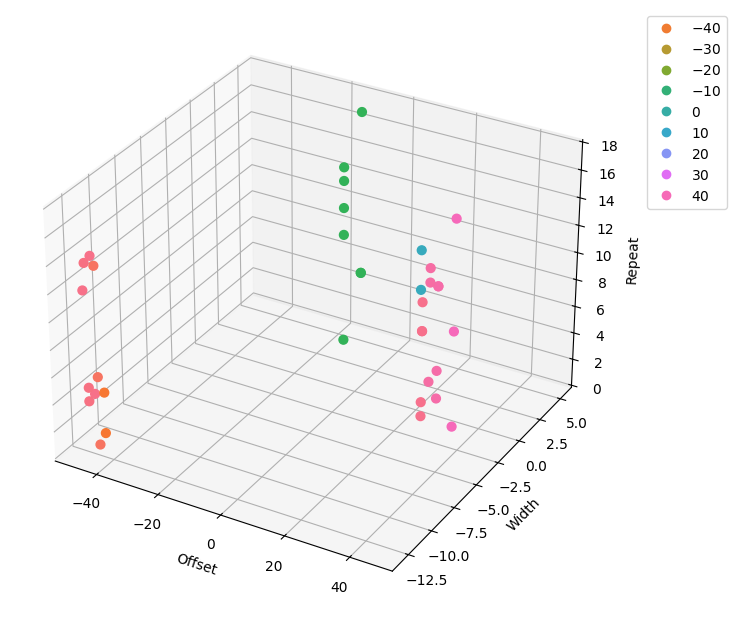

In [26]:
import re, seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
n = 200
x = df["scope.glitch.offset"]
y = df["scope.glitch.width"]
z = df["scope.glitch.repeat"]

# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=x, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Offset')
ax.set_ylabel('Width')
ax.set_zlabel('Repeat')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

In [ ]:
sns.histplot(df[(df["scope.glitch.ext_offset"] >2000)]["scope.glitch.ext_offset"], bins=3000) # First isogeny is 5 isogeny

In [27]:
isogeny_in_distance(0, 0)

[261, 158]

In [31]:
isogeny_in_distance(0, 1)

[220, 199]

In [32]:
isogeny_in_distance(0, 2)

[344, 75]